# 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기 & 시각화

In [5]:
df = pd.read_csv("data0405.csv")
df.head()

,x,y
0,-0.090,2.012
1,-1.182,-6.716
2,-1.107,-5.609
3,-1.213,-4.810
4,0.066,2.220


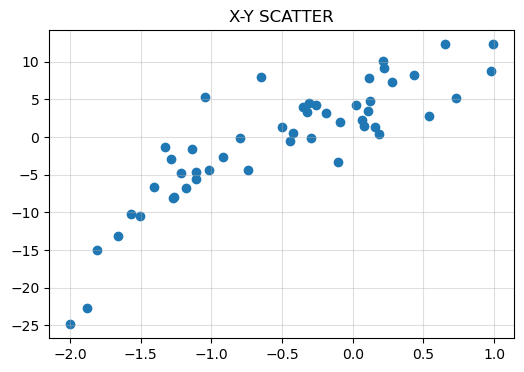

In [120]:
plt.figure(figsize = (6, 4))
plt.scatter(df.x, df.y)
plt.grid(alpha = 0.4)
plt.title('X-Y SCATTER')
plt.show()

# 최소제곱법(Least Squared Method)

## 선형회귀(Linear Regression)

parameter : [[3.94188011]
 [8.73592461]]


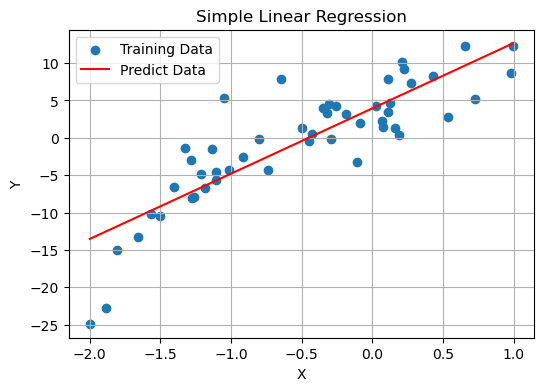

In [312]:
# 행렬 연산을 위한 형변환(Pandas Series => np.array)
X = np.array(df['x']).reshape(-1, 1)
y = np.array(df['y']).reshape(-1, 1)
# print(X, type(X), end = '\n\n')
# print(y, type(y))

# 절편에 의해 x와 w의 개수가 다르므로 행렬 연산을 위해 x의 1열에 1을 가가
X = np.hstack((X ** 0, X))

# 최소제곱법 적용 => 만약 X, y를 np.matrix형으로 바꿔준다면 조금 더 쉽게 가능
w = np.linalg.inv(X.T @ X) @ X.T @ y
print(f"parameter : {w}")

# 예측 데이터를 시각화하기 위해 x의 범위를 설정하고 이를 이용해서 직선 생성
xp = np.arange(-2, 1, 0.01)
yp = w[0, 0] + w[1, 0] * xp

# 시각화
plt.figure(figsize = (6, 4))
plt.scatter(df.x, df.y, label = 'Training Data')
plt.plot(xp, yp, 'r', label = 'Predict Data')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## 비선형 회귀(Non-Linear Regression)
- 사실 선형회귀의 선형은 w에 대한 것으로 정확히 말하면 밑에 코드도 선형회귀이다.
- 위 코드들은 x에 대해서도 선형이지만 다음 코드들은 x에 대해서는 비선형이므로 구분짓기 위해 비선형 회귀라고 한다.

1차 파라미터 : [[3.94188011]
 [8.73592461]]

2차 파라미터 : [[ 5.03906362]
 [ 5.27924916]
 [-3.31676315]]

3차 파라미터 : [[3.6457795 ]
 [3.49974442]
 [1.18946732]
 [3.17767325]]

4차 파라미터 : [[ 3.63261904]
 [ 5.43470387]
 [ 1.83955091]
 [ 0.76437773]
 [-1.20609535]]

5차 파라미터 : [[ 3.61061334]
 [ 5.47312231]
 [ 2.08502315]
 [ 0.78147682]
 [-1.43900644]
 [-0.09553539]]

6차 파라미터 : [[ 3.59707403]
 [ 5.38144555]
 [ 2.25503466]
 [ 1.18095904]
 [-1.51258826]
 [-0.41693189]
 [-0.10660773]]

7차 파라미터 : [[  3.42304118]
 [  7.25637278]
 [  5.88232988]
 [ -6.55807494]
 [-12.40737942]
 [  3.29074412]
 [  7.7420988 ]
 [  2.20761863]]

8차 파라미터 : [[  2.82264096]
 [  8.21097947]
 [ 20.54719625]
 [ -2.9792552 ]
 [-52.20773517]
 [-23.45762297]
 [ 28.45633897]
 [ 25.21178847]
 [  5.36353932]]

9차 파라미터 : [[  2.8115095 ]
 [  7.99796053]
 [ 20.97683193]
 [ -0.57694928]
 [-52.67906819]
 [-28.9458799 ]
 [ 26.12392745]
 [ 28.07252893]
 [  7.79574527]
 [  0.5043741 ]]

10차 파라미터 : [[  2.70561056]
 [  8.74663574]
 [ 24.11081405]
 [

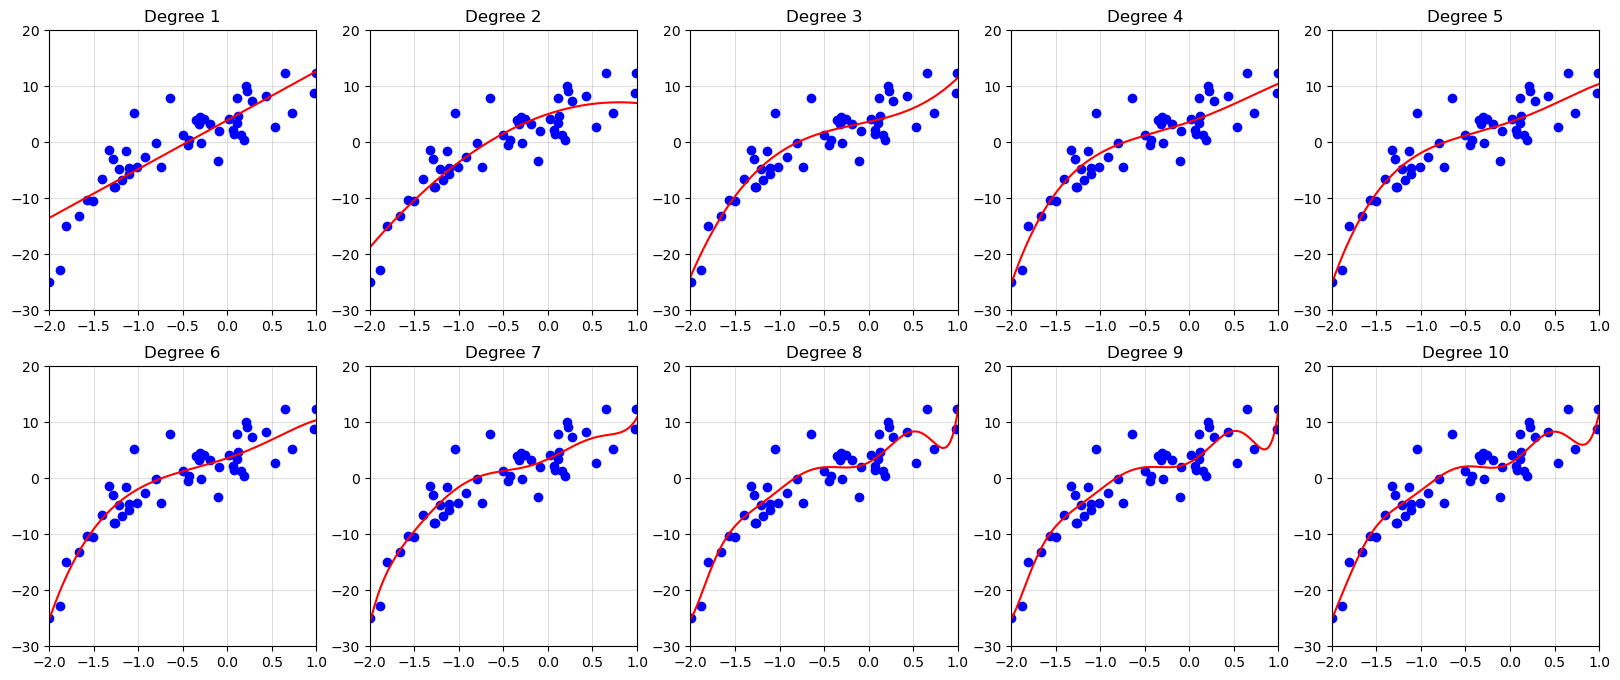

In [515]:
# 행렬 연산을 위한 형변환(Pandas Series => np.array)
X = np.array(df['x']).reshape(-1, 1)
y = np.array(df['y']).reshape(-1, 1)
xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)
# print(X, type(X), end = '\n\n')
# print(y, type(y))

# 그래프 구역 별로 나누기
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

# 차수에 따른 예측함수를 구하기 위해 반복시행
for degree in range(1, 11):
    polybasis = np.hstack([xp** j for j in range(degree + 1)]) # 차수에 따른 테스트 데이터 생성
    
    A = np.hstack([X ** j for j in range(degree + 1)]) # 차수에 따른 훈련 데이터 생성
    w = np.linalg.inv(A.T @ A) @ A.T @ y # 최소제곱법으로 w 구하기
    yp = polybasis @ w # 구한 w와 테스트 데이터로 예측함수 구기기
    print(f"{degree}차 파라미터 : {w}", end = '\n\n')

    # 시각화
    ax = axes[degree-1]
    ax.plot(X, y, 'bo', label='Training Data')
    ax.plot(xp, yp, 'r', label='Predict Data')
    ax.set_title(f'Degree {degree}')
    ax.set_xlim(-2, 1)    
    ax.set_ylim(-30, 20)
    ax.grid(alpha=0.4)
plt.show()

# 경사하강법(Gradient Decent)

## 선형회귀 함수일 경우

Parameter : (array([0.06825886]), array([2.23603262]))


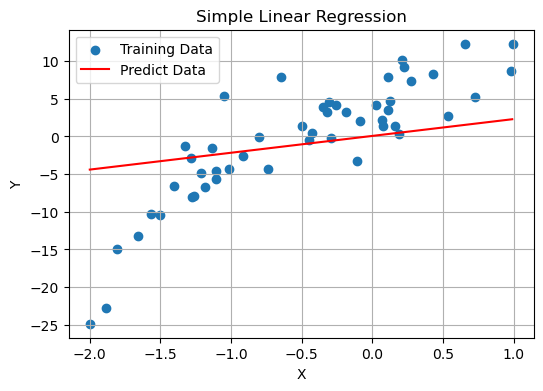

In [344]:
# 행렬 연산을 위한 형변환(Pandas Series => np.array)
X = np.array(df['x']).reshape(-1, 1)
y = np.array(df['y']).reshape(-1, 1)
# print(X, type(X), end = '\n\n')
# print(y, type(y))

# 파라미터의 초기값, 에포크, 학습률 설정
w1, w0 = 0, 0
lr = 0.001
epoch = 500
n = float(len(X))

# 설정한 에포크만큼 반복시행
for _ in range(epoch):
    y_pred = w0 + w1 * X # 예측함수 정의
    w0 -= lr * (1 / n) * sum(y_pred - y) # w0 업데이트
    w1 -= lr * (1 / n) * sum(X * (y_pred - y)) # w1 업데이트
print(f"Parameter : {w0, w1}")

# 테스트 데이터, 예측 데이터 생성
xp = np.arange(-2, 1, 0.01)
yp = w0 + w1 * xp

# 시각화
plt.figure(figsize = (6, 4))
plt.scatter(df.x, df.y, label = 'Training Data')
plt.plot(xp, yp, 'r', label = 'Predict Data')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## 비선형 회귀 함수일 경우

2차 파라미터 : [[ 0.46137619]
 [ 1.71642697]
 [-2.02921761]]

3차 파라미터 : [[ 0.83243199]
 [ 0.8874882 ]
 [-0.74628508]
 [ 2.16835333]]

4차 파라미터 : [[ 0.96730967]
 [ 0.61615766]
 [-0.09587643]
 [ 0.9784752 ]
 [-1.04970844]]



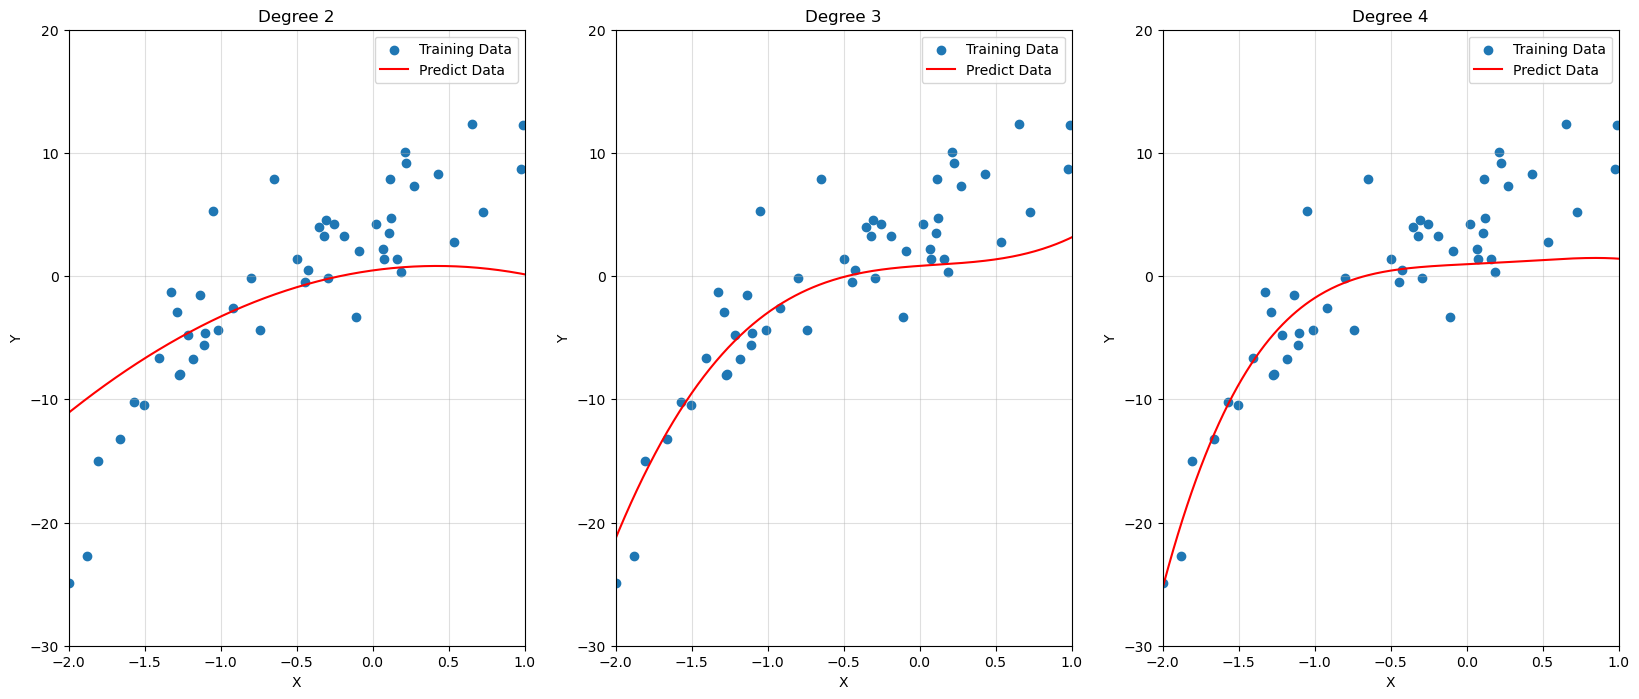

In [513]:
# 행렬 연산을 위한 형변환(Pandas Series => np.array)
X = np.array(df['x']).reshape(-1, 1)
y = np.array(df['y']).reshape(-1, 1)
xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)
# print(X, type(X), end = '\n\n')
# print(y, type(y))

# 그래프 구역 나기기
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# 학습률, 에포크, 데이터 개수 할당
lr = 0.001
epoch = 500
n = float(len(X))

# 2차 ~ 4차를 구하기 위해 반복문
for degree in range(2, 5):
    w = np.zeros((degree + 1, 1)) # 차수 + 1만큼의 가중치가 생기므로 degree + 1개의 0을 w에 할당
    A = np.hstack([X ** j for j in range(degree + 1)]) # X에 차수를 반영한 행렬 생성
    for _ in range(epoch): # epoch만큼 반복 실행
        y_pred = A @ w # 내적을 통해 예측함수 생성
        polybasis = np.hstack([xp ** j for j in range(degree + 1)]) 
        w -= lr * (1 / n) * (A.T @ (y_pred - y)) # 경사하강법
    print(f"{degree}차 파라미터 : {w}", end = '\n\n')
    yp = polybasis @ w # 예측된 값

    # 시각화
    ax = axes[degree - 2]
    ax.scatter(X, y, label='Training Data')
    ax.plot(xp, yp, 'r',label= 'Predict Data')
    ax.set_xlim(-2, 1)    
    ax.set_ylim(-30, 20)
    ax.set_title(f'Degree {degree}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid(alpha=0.4)
    ax.legend()
plt.show()

# 최소제곱법 VS 경사하강법

## 최소제곱법
- 최소제곱법은 Closed-form-solution으로 식을 통하여 명확한 해답이 존재한다.
- Cost function의 값이 제일 작을 때의 Parameter를 단번에 구할 수 있어 그래프를 보게 되면 예측선이 데이터를 잘 예측하는 것을 볼 수 있다.
- 하지만 (A.T * A).I * A.T * Y에서 (A.T * A).I가 존재하지 않는다면 답을 구할 수 없다는 치명적인 단점이 존재한다.

## 경사하강법
- 경사하강법은 Numerical-solution으로 해답에 점점 접근해 나가는 방식이다.
- 경사하강법은 미분을 통하여 Cost function의 값을 점점 작게 만드는 것으로 epoch와 learning rate을 사람이 직접 조정할 수 있다.
- 경사하강법의 그래프를 보게 되면 어느정도 예측은 하지만 최소제곱법에 비해서는 성능이 덜하다는 것을 알 수 있으며 상황에 따라 Overfitting, Underfitting이 발생한다.

### 최소제곱법의 2 ~ 4차 파라미터

- 2차 파라미터 : [[ 5.03906362]
 [ 5.27924916]
 [-3.31676315]]
- 3차 파라미터 : [[3.6457795 ]
 [3.49974442]
 [1.18946732]
 [3.17767325]]
- 4차 파라미터 : [[ 3.63261904]
 [ 5.43470387]
 [ 1.83955091]
 [ 0.76437773]
 [-1.20609535]]

### 경사하강법의 2 ~ 4차 파라미터
- 초기값을 0으로 설정해서 최소제곱법으로 구한 파라미터에 비해 0에 가까운 것 같다.

- 2차 파라미터 : [[ 0.46137619]
 [ 1.71642697]
 [-2.02921761]]
- 3차 파라미터 : [[ 0.83243199]
 [ 0.8874882 ]
 [-0.74628508]
 [ 2.16835333]]
- 4차 파라미터 : [[ 0.96730967]
 [ 0.61615766]
 [-0.09587643]
 [ 0.9784752 ]
 [-1.04970844]]